In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import sklearn as sk
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

In [2]:
world_rank = pd.read_csv('D:\Coursera_ML_MATERIAL\ssarkar\cwurData.csv')

In [5]:
world_rank.info()
world_rank.describe([0.25,0.50,0.75,0.99])
world_rank.columns
world_rank[list(world_rank.dtypes[world_rank.dtypes=='object'].index)].head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
world_rank              2200 non-null int64
institution             2200 non-null object
country                 2200 non-null object
national_rank           2200 non-null int64
quality_of_education    2200 non-null int64
alumni_employment       2200 non-null int64
quality_of_faculty      2200 non-null int64
publications            2200 non-null int64
influence               2200 non-null int64
citations               2200 non-null int64
broad_impact            2000 non-null float64
patents                 2200 non-null int64
score                   2200 non-null float64
year                    2200 non-null int64
dtypes: float64(2), int64(10), object(2)
memory usage: 240.7+ KB


,institution,country
0,Harvard University,USA
1,Massachusetts Institute of Technology,USA
2,Stanford University,USA
3,University of Cambridge,United Kingdom
4,California Institute of Technology,USA
5,Princeton University,USA
6,University of Oxford,United Kingdom
7,Yale University,USA
8,Columbia University,USA
9,"University of California, Berkeley",USA


In [6]:
world_rank.shape

(2200, 14)

In [8]:
world_rank.isnull().all()
world_rank.isnull().any()
#round(100*(world_rank.isnull().sum()/len(world_rank.index)),2)

world_rank              False
institution             False
country                 False
national_rank           False
quality_of_education    False
alumni_employment       False
quality_of_faculty      False
publications            False
influence               False
citations               False
broad_impact             True
patents                 False
score                   False
year                    False
dtype: bool

In [9]:
world_rank= world_rank[~world_rank.broad_impact.isnull()]


In [13]:
round(100*(world_rank.isnull().sum()/len(world_rank.index)),2)

AttributeError: 'int' object has no attribute 'astype'

In [18]:
E=100*(world_rank.isnull().sum()/len(world_rank.index))

In [19]:
print(E)

world_rank              0.0
institution             0.0
country                 0.0
national_rank           0.0
quality_of_education    0.0
alumni_employment       0.0
quality_of_faculty      0.0
publications            0.0
influence               0.0
citations               0.0
broad_impact            0.0
patents                 0.0
score                   0.0
year                    0.0
dtype: float64


In [22]:
Q=E.astype(float)

In [23]:
print Q

world_rank              0.0
institution             0.0
country                 0.0
national_rank           0.0
quality_of_education    0.0
alumni_employment       0.0
quality_of_faculty      0.0
publications            0.0
influence               0.0
citations               0.0
broad_impact            0.0
patents                 0.0
score                   0.0
year                    0.0
dtype: float64


In [25]:
world_rank = world_rank.drop('year',axis='columns')

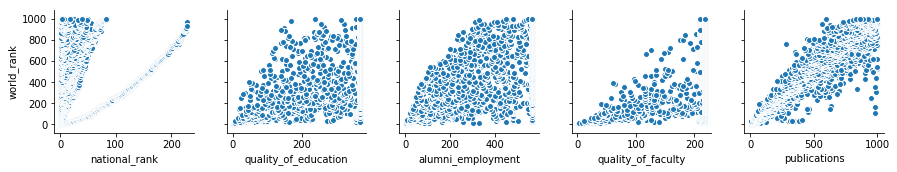

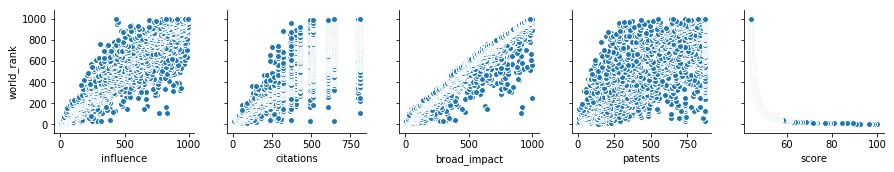

In [26]:
sns.pairplot(world_rank,x_vars = ['national_rank','quality_of_education','alumni_employment',
                       'quality_of_faculty','publications'],y_vars = 'world_rank')
sns.pairplot(world_rank,x_vars = ['influence','citations','broad_impact',
                       'patents','score'],y_vars = 'world_rank')
plt.show()

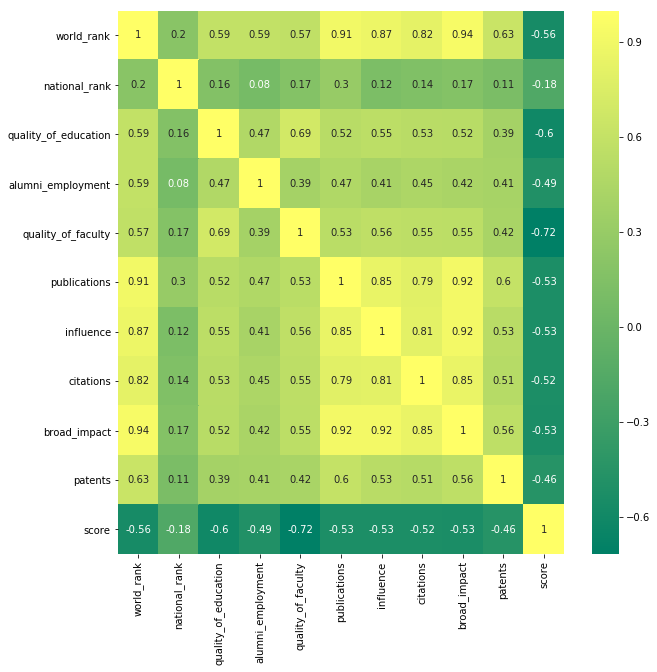

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(world_rank.corr(),annot = True,cmap='summer')



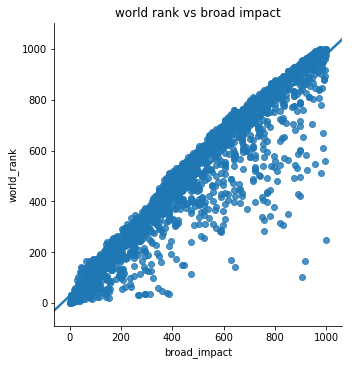

In [29]:
sns.lmplot(x = 'broad_impact',y= 'world_rank',data = world_rank)
plt.title('world rank vs broad impact')
plt.show()

# country_frame = pd.get_dummies(world_rank.country,drop_first=True)
df_world_rank = pd.concat([world_rank,country_frame],axis = 'columns')
df_world_rank = df_world_rank.drop(list(df_world_rank.dtypes[df_world_rank.dtypes=='object'].index),axis='columns')
df_train,df_test = train_test_split(df_world_rank,train_size = 0.7,test_size=0.3,random_state=42)
from sklearn.preprocessing import StandardScaler,MinMaxScaler
vars = ['world_rank', 'national_rank', 'quality_of_education',
       'alumni_employment', 'quality_of_faculty', 'publications', 'influence',
       'citations', 'broad_impact', 'patents', 'score']
scaler = MinMaxScaler()
df_train[vars] = scaler.fit_transform(df_train[vars])
df_train.shape
df_train.head(10)

In [32]:
country_frame = pd.get_dummies(world_rank.country,drop_first=True)

df_world_rank = pd.concat([world_rank,country_frame],axis = 'columns')

df_world_rank = df_world_rank.drop(list(df_world_rank.dtypes[df_world_rank.dtypes=='object'].index),axis='columns')

df_train,df_test = train_test_split(df_world_rank,train_size = 0.7,test_size=0.3,random_state=42)

from sklearn.preprocessing import StandardScaler,MinMaxScaler

vars = ['world_rank', 'national_rank', 'quality_of_education',
       'alumni_employment', 'quality_of_faculty', 'publications', 'influence',
       'citations', 'broad_impact', 'patents', 'score']
scaler = MinMaxScaler()
df_train[vars] = scaler.fit_transform(df_train[vars])


df_train.shape
df_train.head(10)

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,...,Sweden,Switzerland,Taiwan,Thailand,Turkey,USA,Uganda,United Arab Emirates,United Kingdom,Uruguay
1036,0.836837,0.132159,0.967213,0.842756,0.963134,0.918838,0.982828,0.985203,0.969970,0.221839,...,0,0,0,0,0,0,0,0,0,0
775,0.575576,0.030837,0.967213,0.362191,0.963134,0.532064,0.936364,0.499383,0.755756,0.320690,...,0,0,0,0,0,0,0,0,0,0
757,0.557558,0.013216,0.967213,0.842756,0.963134,0.492986,0.416162,0.381011,0.459459,0.845977,...,0,0,0,0,0,0,0,0,0,0
1435,0.235235,0.052863,1.000000,1.000000,1.000000,0.157315,0.102020,0.394575,0.187187,0.589655,...,0,0,0,0,0,0,0,0,0,0
1560,0.360360,0.559471,0.674863,0.358657,1.000000,0.466934,0.304040,0.324291,0.338338,0.583908,...,0,0,0,0,0,1,0,0,0,0
1547,0.347347,0.044053,1.000000,0.611307,0.852535,0.305611,0.553535,0.394575,0.317317,0.319540,...,0,0,0,0,0,0,0,0,0,0
1361,0.161161,0.035242,0.855191,0.238516,0.617512,0.146293,0.126263,0.123305,0.126126,0.777011,...,0,0,0,0,0,0,0,0,0,0
1642,0.442442,0.101322,0.456284,0.860424,1.000000,0.368737,0.708081,0.794081,0.479479,0.170115,...,0,0,0,0,0,0,0,0,0,0
486,0.286286,0.105727,0.655738,0.136042,0.963134,0.392786,0.321212,0.270037,0.354354,0.551724,...,0,0,0,0,0,0,0,0,1,0
1804,0.604605,0.784141,1.000000,1.000000,1.000000,0.495992,0.512121,0.526510,0.539540,0.671264,...,0,0,0,0,0,1,0,0,0,0


In [33]:
y_train = df_train.pop('world_rank')
X_train = df_train

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(df):
    vif = pd.DataFrame()
    X = df
    vif['features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)    
    vif = vif.sort_values(by = 'VIF',ascending=False)
    return vif

from sklearn.linear_model import LinearRegression
lm = LinearRegression()

from sklearn.feature_selection import RFE
lm.fit(X_train,y_train)
rfe = RFE(lm,15)
rfe = rfe.fit(X_train,y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('national_rank', False, 14),
 ('quality_of_education', True, 1),
 ('alumni_employment', True, 1),
 ('quality_of_faculty', False, 33),
 ('publications', True, 1),
 ('influence', False, 40),
 ('citations', False, 45),
 ('broad_impact', True, 1),
 ('patents', True, 1),
 ('score', True, 1),
 ('Australia', False, 34),
 ('Austria', False, 44),
 ('Belgium', False, 29),
 ('Brazil', False, 41),
 ('Bulgaria', False, 39),
 ('Canada', False, 50),
 ('Chile', False, 3),
 ('China', False, 23),
 ('Colombia', True, 1),
 ('Croatia', False, 2),
 ('Cyprus', False, 5),
 ('Czech Republic', False, 49),
 ('Denmark', False, 35),
 ('Egypt', False, 52),
 ('Estonia', False, 37),
 ('Finland', False, 21),
 ('France', False, 11),
 ('Germany', False, 26),
 ('Greece', False, 31),
 ('Hong Kong', False, 51),
 ('Hungary', False, 48),
 ('Iceland', False, 54),
 ('India', True, 1),
 ('Iran', False, 12),
 ('Ireland', False, 36),
 ('Israel', False, 4),
 ('Italy', False, 17),
 ('Japan', False, 16),
 ('Lebanon', True, 1),
 ('

In [34]:
cols = X_train.columns[rfe.support_]
cols

Index([u'quality_of_education', u'alumni_employment', u'publications',
       u'broad_impact', u'patents', u'score', u'Colombia', u'India',
       u'Lebanon', u'Malaysia', u'Russia', u'Saudi Arabia', u'Singapore',
       u'South Africa', u'South Korea'],
      dtype='object')

In [35]:
X_train_rfe = X_train[cols]

X_train_rfe.head()

,quality_of_education,alumni_employment,publications,broad_impact,patents,score,Colombia,India,Lebanon,Malaysia,Russia,Saudi Arabia,Singapore,South Africa,South Korea
1036,0.967213,0.842756,0.918838,0.969970,0.221839,0.007860,0,0,0,0,0,0,0,0,1
775,0.967213,0.362191,0.532064,0.755756,0.320690,0.015541,0,1,0,0,0,0,0,0,0
757,0.967213,0.842756,0.492986,0.459459,0.845977,0.016434,0,0,0,0,0,0,0,0,0
1435,1.000000,1.000000,0.157315,0.187187,0.589655,0.049839,0,0,0,0,0,0,0,0,0
1560,0.674863,0.358657,0.466934,0.338338,0.583908,0.024830,0,0,0,0,0,0,0,0,0


In [36]:
# Model 1
import statsmodels.api as sm
X_train_lm1 = sm.add_constant(X_train_rfe)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:             world_rank   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1935.
Date:                Tue, 07 May 2019   Prob (F-statistic):               0.00
Time:                        15:09:08   Log-Likelihood:                 1896.9
No. Observations:                1400   AIC:                            -3762.
Df Residuals:                    1384   BIC:                            -3678.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1213 

In [38]:
# Model 2
import statsmodels.api as sm
X_train_new2 = X_train_rfe.drop('Singapore',axis='columns')
X_train_lm2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:             world_rank   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     2071.
Date:                Tue, 07 May 2019   Prob (F-statistic):               0.00
Time:                        15:10:03   Log-Likelihood:                 1895.7
No. Observations:                1400   AIC:                            -3761.
Df Residuals:                    1385   BIC:                            -3683.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1212 

In [39]:
# Model 3
X_train_new3 = X_train_new2.drop('Colombia',axis='columns')
X_train_lm3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:             world_rank   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     2226.
Date:                Tue, 07 May 2019   Prob (F-statistic):               0.00
Time:                        15:10:24   Log-Likelihood:                 1894.0
No. Observations:                1400   AIC:                            -3760.
Df Residuals:                    1386   BIC:                            -3687.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1212 

In [42]:
vif1 = X_train_lm3.drop('const',axis='columns')
#calculate_vif(vif1)

In [44]:
VIF2=vif1.astype(float)

In [45]:
print VIF2

      quality_of_education  alumni_employment  publications  broad_impact  \
1036              0.967213           0.842756      0.918838      0.969970   
775               0.967213           0.362191      0.532064      0.755756   
757               0.967213           0.842756      0.492986      0.459459   
1435              1.000000           1.000000      0.157315      0.187187   
1560              0.674863           0.358657      0.466934      0.338338   
1547              1.000000           0.611307      0.305611      0.317317   
1361              0.855191           0.238516      0.146293      0.126126   
1642              0.456284           0.860424      0.368737      0.479479   
486               0.655738           0.136042      0.392786      0.354354   
1804              1.000000           1.000000      0.495992      0.539540   
1257              0.068306           0.692580      0.072144      0.096096   
798               0.967213           0.291519      0.592184      0.896897   